## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We are given with two variables, one is independent i.e. Hours and another one is scores which we need to predict. Let's see how this data looks on graph.

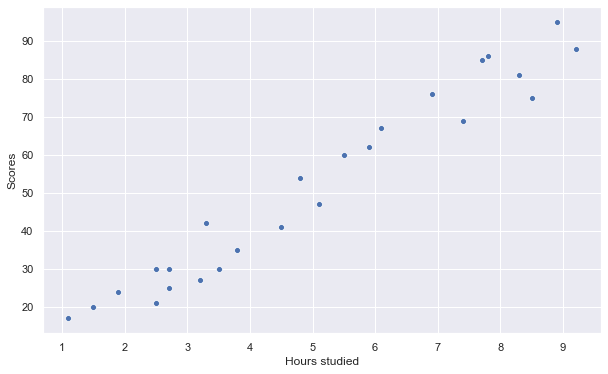

In [10]:
# plot scatter plot
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Hours", y="Scores", data=df)
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show()

From the above graph we can see a positive relation between the two variables. As a student studies more hours he/she tends to score more marks in the exams.

## Model Building

As this data does not requires data cleaning or processing, we will start preparing the data for model building.

In [15]:
X = df.iloc[:,:1].values
y = df.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now we have prepared the data, we can split the data and fit the model on the training set.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Traing the algorithm
Now we will instantiate LinearRegression model and train our data on it so as to make prediction.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Training complete!")

Training complete!


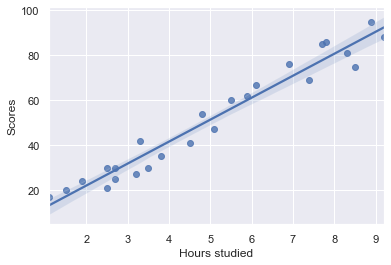

In [20]:
# Plot a regplot using seaborn to observe the best fit line.
sns.regplot(X, y)
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show()

## Make prediction
Now that our model is trained, let us make prediction using the test data set.

In [21]:
#Predicting the scores
y_pred = model.predict(X_test)

In [22]:
# Comparing the actual vs. predicted scores
df = pd.DataFrame({"Actual": y_test, "predicted": y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Solution

Now we will answer the following question.

##### What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
#Predict the scores for a student who studies for 9.25 hrs
hrs = 9.25

pred = model.predict([[hrs]])

print("The student who studies for {} may get around {} marks.".format(hrs, np.round(pred,2)))

The student who studies for 9.25 may get around [93.69] marks.


## Model Evaluation

The final step is to evaluate the performance of our algorithm. This step is particularly important compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002975


Mean absolute error shows the absolute average error that our model does while predicting the test labels.